# SIR Model: COVID-19 no Maranhão
Este notebook é uma demonstração de cenários das curvas de progressões do COVID-19 no Maranhão, usando o modelo epidemiológico chamado SIR.

---

# Sumário

1. [Desenvolvimento](#desenvolvimento)
1. [O que é o modelo SIR?](#Oque)
1. [COVID-19 no Maranhão](#ma)
1. [Metodologia e resultados](#met)
1. [Conclusão](#conclusao)


---

<div id="desenvolvimento"></div>
# Desenvolvimento
* The code used on this notebook was created based on the example provided on the book [Learning Scientific Programming with Python](https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/), written by Christian Hill;
* The coefficientes used on this notebook were extracted from [Modeling and forecasting the Covid-19 pandemic in Brazil](https://www.joserobertoafonso.com.br/modeling-and-forecasting-the-covid-19-pandemic-in-brazil-bastos-cajueiro/) paper, written by Saulo B.Bastos and Daniel O. Cajueiro.

<div id="Oque"></div>
# O que é o modelo SIR?
De acordo com o [Wikipedia](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology), modelo SIR é:

> One of the simplest compartmental models, and many models are derivatives of this basic form. The model consists of three compartments: S for the number of susceptible, I for the number of infectious, and R for the number of recovered or deceased (or immune) individuals. This model is reasonably predictive for infectious diseases which are transmitted from human to human, and where recovery confers lasting resistance, such as measles, mumps and rubella.

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/29728a7d4bebe8197dca7d873d81b9dce954522e' alt='SIR equation'>

Basically, the SIR model provides three curves, or compartments: the number of susceptible, infected and recovered people over time. The model is build over a differential equation that considers:

* the infection rate (β);
* the average infection duration (γ);
* the number of infected people at  the begining (I0);
* the number of recovered people at the begining (R0);
* the population size (N).

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/SIR_Flow_Diagram.svg/1200px-SIR_Flow_Diagram.svg.png' alt='SIR flow'>

<div id="ma"></div>
# COVID-19 no Maranhão
According to the Brazilian Health Ministry, here in Brazil, the COVID-19 infection is spreading based on the following:

* Taxa de infecção (β) de 0.449, para a quarentena e isolamento social;
* Média de duração da infeccção (γ) of 5.2 days;
* 1 caso confirmado em 20 de Março;
* Tamanho da população é de 6.8300000 milhão.

<div id="met"></div>
# Metodologia e resultados
O código implementado tem os seguintes métodos: `deriv()` e `sir()`. O primeiro método constroi as equações diferenciais que descrevem o modelo SIR. O segundo implementa o modelo, passando as variáveis S,R, I e os coeficientes retornando as variáveis que compõe o modelo.

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [6]:
def deriv(y, t, N, beta, gama):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gama * I
    dRdt = gama * I
    return dSdt, dIdt, dRdt

def sir(N, beta, gama=1/10, I0=1, R0=0, t=100):
    t = np.linspace(0, t, t)
    S0 = N - I0 - R0
    y0 = S0, I0, R0
    ret = odeint(deriv, y0, t, args=(N, beta, gama))
    S, I, R = ret.T
    return {'S': S, 'I': I, 'R': R, 't': t}

def curves(s, title):

        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(s['t'], s['S'], 'b', alpha=0.5, lw=4, label='Suscetíveis')
        plt.plot(s['t'], s['I'], 'r', alpha=0.5, lw=4, label='Infectados')
        plt.plot(s['t'], s['R'], 'g', alpha=0.5, lw=4, label='Recuperados')
        plt.grid(which='major', axis='y')
        plt.ticklabel_format(scilimits=(6,6), axis='y')
        plt.text(0.9,1,s='β: %.3f γ: %.2f' % (beta, gama), transform=ax.transAxes, fontsize=10)
        plt.title(title, fontsize=14, fontweight='bold', color='#333333')
        plt.xlabel('Dias', fontsize=12)
        plt.ylabel('Número de casos (milhão)', fontsize=12)
        legend = plt.legend(loc=5, fontsize=12)
        ax.set_ylim(0)
        [ax.spines[spine].set_visible(False) for spine in ('top', 'right', 'left')]
        plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
        plt.show();


## No actions taken
The following model simulates a context where no-actions are taken. The average infection duration is `5.2` days and the [standard infection rate](https://www.nejm.org/doi/full/10.1056/NEJMe2002387) is `2.2`.

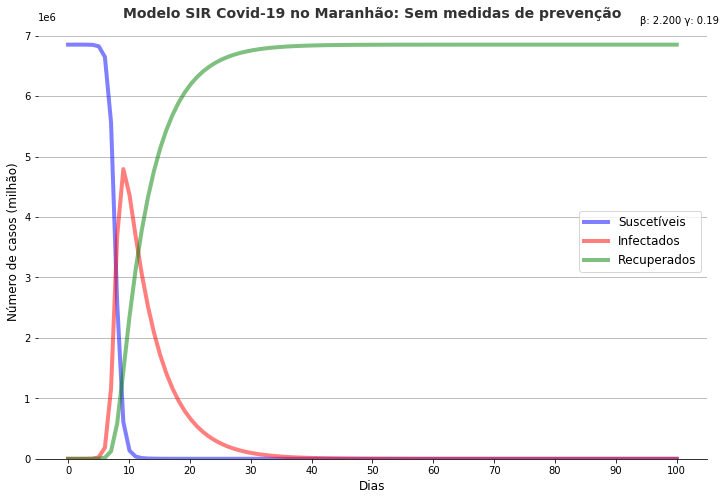

In [14]:
gama = 1/5.2
beta = 2.2
curves(sir(6851000 , beta, gama, t=100, I0=1), 'Modelo SIR Covid-19 no Maranhão: Sem medidas de prevenção')

## Social Distancing
The next model simulates a context where the population is oriented to keep social distancing. In this context, the average infection duration is also `5.2` days, but the infection rate is reduced by 60%, becoming `0.88`.

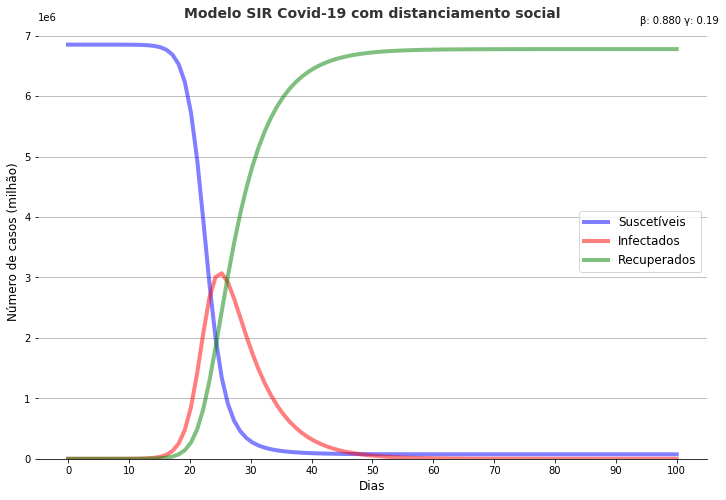

In [15]:
beta = 0.88
curves(sir(6851000, beta, gama, t=100, I0=1), 'Modelo SIR Covid-19 com distanciamento social')

## Social Distancing and quarantine
Finally, the last model simulates a combination of social distancing and quarantine. The average infection duration remains on `5.2` days, but the infection rate is reduced by 80%, becoming `0.449`.

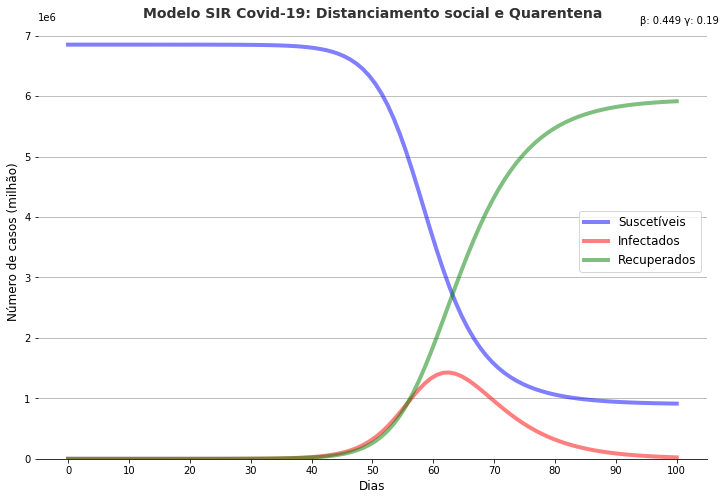

In [16]:
beta = 0.449
curves(sir(6851000, beta, gama, t=100, I0=1), 'Modelo SIR Covid-19: Distanciamento social e Quarentena')

<div id="conclusão"></div>
# Conclusão
Given the recent social distancing and quarantine efforts, Brazil will face something between 50 and 140 million infected people during the next 60 days. According to the World Health Organization, 80% of the infected people manifest mild symptoms or no sign of infection. It's evident the importance of social distancing and quarantine efforts to minimize the infection spread rate and avoid the healthcare infrastructure collapse.